# Data cleaning and preparation
This notebook was used to perform analysis on missing data, imputation, cleaning, preprocessing, feature selection, and merging weather data for points with (>0) and without wildfires (=0)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
The glossary for some of the column meanings can be found [here](https://climate.weather.gc.ca/glossary_e.html)

In [3]:
no_wildfire_df = pd.read_csv('no-wildfire-weather.csv')

C:\Users\ethan\AppData\Local\Temp\ipykernel_20004\1263320575.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  no_wildfire_df = pd.read_csv('no-wildfire-weather.csv')


In [4]:
no_wildfire_df

,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,LOCAL_MONTH,LOCAL_DAY,DIRECTION_MAX_GUST,MIN_REL_HUMIDITY_FLAG,...,HEATING_DEGREE_DAYS_FLAG,TOTAL_SNOW_FLAG,LOCAL_DATE,MIN_TEMPERATURE,PROVINCE_CODE,SPEED_MAX_GUST_FLAG,SPEED_MAX_GUST,MAX_TEMPERATURE,MEAN_TEMPERATURE_FLAG,SNOW_ON_GROUND_FLAG
0,0,EGG ISLAND,BC,51.1450,-127.500730,14.0,1.0,20.0,NaN,NaN,...,NaN,NaN,2000-01-20 00:00:00,-1.3,BC,NaN,NaN,3.3,NaN,NaN
1,0,SAMBAA K'E,NT,60.2627,-121.142000,498.0,5.0,8.0,NaN,NaN,...,NaN,NaN,2000-05-08 00:00:00,-2.2,NT,NaN,NaN,14.5,NaN,NaN
2,0,SAMBAA K'E,NT,60.2627,-121.142000,498.0,5.0,22.0,NaN,NaN,...,NaN,NaN,2000-05-22 00:00:00,-0.9,NT,NaN,NaN,15.1,NaN,NaN
3,0,FORT NELSON UA,BC,58.5029,-122.342207,378.3,4.0,24.0,NaN,NaN,...,NaN,NaN,2001-04-24 00:00:00,0.4,BC,NaN,NaN,18.5,NaN,NaN
4,0,PETITOT LO,AB,59.3200,-119.370000,777.2,5.0,7.0,NaN,NaN,...,M,M,2000-05-07 00:00:00,NaN,AB,NaN,NaN,NaN,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34060,0,YOHO PARK,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,...,M,M,2000-08-02 00:00:00,NaN,BC,M,NaN,NaN,M,NaN
34061,0,YORKTON A,NaN,NaN,NaN,NaN,2.0,19.0,0.0,M,...,NaN,NaN,2000-02-19 00:00:00,-16.5,SK,NaN,0.0,-2.7,NaN,NaN
34062,0,YORKTON RCMP SNOW,NaN,NaN,NaN,NaN,1.0,31.0,NaN,NaN,...,NaN,NaN,2010-01-31 00:00:00,NaN,SK,NaN,NaN,NaN,NaN,NaN
34063,0,YOUNGSTOWN AGCM,NaN,NaN,NaN,NaN,6.0,25.0,21.0,NaN,...,NaN,NaN,2018-06-25 00:00:00,14.3,AB,NaN,44.0,31.2,NaN,NaN


In [5]:
wildfire_df = pd.read_csv('fires-weather.csv')

C:\Users\ethan\AppData\Local\Temp\ipykernel_20004\885837184.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire_df = pd.read_csv('fires-weather.csv')


In [6]:
wildfire_df

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,51.1450,-127.50073,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,1,49.2971,-122.2321,2000-08-21,0.20,PITT LAKE,BC,49.2600,-122.31000,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,55.8000,-124.8167,2005-06-20,0.01,MESILINKA CAMP,BC,56.0700,-124.30000,803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49.8770,-121.5730,2000-08-06,0.10,LYTTON A,BC,50.1328,-121.34550,224.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,49.0667,-121.8333,2000-07-28,0.10,VEDDER SOUTH LICKMAN,BC,49.0600,-122.00000,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148758,148756,65.0282,-141.2460,2024-05-15,0.00,CLINTON CREEK,YT,64.2800,-140.44000,576.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148759,148757,55.9370,-121.9170,2024-05-12,295.00,HUDSON HOPE BCHPA DAM,BC,56.0100,-122.12000,678.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148760,148758,60.2150,-112.8720,2024-04-26,0.10,BEAR TOWER,NT,60.3100,-113.14000,213.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148761,148759,60.1950,-112.7960,2024-04-26,0.10,BEAR TOWER,NT,60.3100,-113.14000,213.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns have mixed types

In [7]:
# Function to check mixed types in columns, returns a dictionary where keys are column names, values are lists of types
def check_mixed_types(df):
    mixed_type_columns = {}
    for column in df.columns:
        types = df[column].map(type).unique()
        if len(types) > 1:
            mixed_type_columns[column] = types
    return mixed_type_columns

In [8]:
mixed_types = check_mixed_types(wildfire_df)

for k, v in mixed_types.items():
    print(k, v)

PROVINCE_CODE [<class 'str'> <class 'float'>]
TOTAL_SNOW_FLAG [<class 'float'> <class 'str'>]
DIRECTION_MAX_GUST_FLAG [<class 'float'> <class 'str'>]
ID [<class 'str'> <class 'float'>]
MIN_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
MAX_REL_HUMIDITY_FLAG [<class 'float'> <class 'str'>]
LOCAL_DATE [<class 'str'> <class 'float'>]
COOLING_DEGREE_DAYS_FLAG [<class 'float'> <class 'str'>]
SNOW_ON_GROUND_FLAG [<class 'float'> <class 'str'>]
MEAN_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
MAX_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
TOTAL_PRECIPITATION_FLAG [<class 'float'> <class 'str'>]
SPEED_MAX_GUST_FLAG [<class 'float'> <class 'str'>]
MIN_REL_HUMIDITY_FLAG [<class 'float'> <class 'str'>]
TOTAL_RAIN_FLAG [<class 'float'> <class 'str'>]
HEATING_DEGREE_DAYS_FLAG [<class 'float'> <class 'str'>]
CLIMATE_IDENTIFIER [<class 'str'> <class 'float'>]


In [9]:
mixed_types = check_mixed_types(no_wildfire_df)

for k, v in mixed_types.items():
    print(k, v)

PROV_STATE_TERR_CODE [<class 'str'> <class 'float'>]
MIN_REL_HUMIDITY_FLAG [<class 'float'> <class 'str'>]
DIRECTION_MAX_GUST_FLAG [<class 'float'> <class 'str'>]
COOLING_DEGREE_DAYS_FLAG [<class 'float'> <class 'str'>]
MAX_REL_HUMIDITY_FLAG [<class 'float'> <class 'str'>]
TOTAL_PRECIPITATION_FLAG [<class 'float'> <class 'str'>]
MIN_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
MAX_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
TOTAL_RAIN_FLAG [<class 'float'> <class 'str'>]
HEATING_DEGREE_DAYS_FLAG [<class 'float'> <class 'str'>]
TOTAL_SNOW_FLAG [<class 'float'> <class 'str'>]
SPEED_MAX_GUST_FLAG [<class 'float'> <class 'str'>]
MEAN_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
SNOW_ON_GROUND_FLAG [<class 'float'> <class 'str'>]


In [10]:
# Check PROVINCE_CODE
value_provinces = wildfire_df['PROVINCE_CODE']
value_str_provinces = value_provinces.apply(lambda x: isinstance(x, str))

In [11]:
province_mix = pd.concat([value_provinces, value_str_provinces], axis=1)
province_mix.columns = ['PROVINCE_CODE', 'IS_STR']
province_mix

,PROVINCE_CODE,IS_STR
0,BC,True
1,NaN,False
2,NaN,False
3,NaN,False
4,NaN,False
...,...,...
148758,NaN,False
148759,NaN,False
148760,NaN,False
148761,NaN,False


Conclusion: `NaN` values are treated as floats, which are not strings -> Must force type conversion

In [12]:
types = {
    'PROV_STATE_TERR_CODE': 'str',
    'PROVINCE_CODE': 'str',
    'TOTAL_SNOW_FLAG': 'str',
    'DIRECTION_MAX_GUST_FLAG': 'str',
    'ID': 'str',
    'MIN_TEMPERATURE_FLAG': 'str',
    'MAX_TEMPERATURE_FLAG': 'str',
    'LOCAL_DATE': 'str',
    'COOLING_DEGREE_DAYS_FLAG': 'str',
    'SNOW_ON_GROUND_FLAG': 'str',
    'MEAN_TEMPERATURE_FLAG': 'str',
    'TOTAL_PRECIPITATION_FLAG': 'str',
}

In [13]:
wildfire_df = pd.read_csv('fires-weather.csv', dtype=types)

In [14]:
no_wildfire_df = pd.read_csv('no-wildfire-weather.csv', dtype=types)

## Duplicates
Checking for duplicate `ID`s because merging caused miss-indexing

In [15]:
# Check for duplicate fire_id because indexing is wrong in the file
duplicates = wildfire_df[wildfire_df['fire_id'].duplicated(keep=False)]
duplicates

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
32682,32682,53.5645,-123.940,2018-06-23,144.1,MAPES,BC,53.53,-123.53,784.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32683,32682,53.5645,-123.940,2018-06-23,144.1,FORT FRASER 13S,BC,53.53,-124.35,701.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145995,145994,48.2770,-80.545,2023-06-23,1.9,CONNAUGHT,ON,48.37,-80.55,281.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145996,145994,48.2770,-80.545,2023-06-23,1.9,CONNAUGHT,ON,48.37,-80.54,281.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Drop duplicates for wildfire weather
wildfire_df = wildfire_df.drop_duplicates(subset='fire_id')

In [17]:
# Drop duplicates for no wildfire weather
no_wildfire_df = no_wildfire_df.drop_duplicates(subset='ID')

In [18]:
no_wildfire_df.head()

,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,LOCAL_MONTH,LOCAL_DAY,DIRECTION_MAX_GUST,MIN_REL_HUMIDITY_FLAG,...,HEATING_DEGREE_DAYS_FLAG,TOTAL_SNOW_FLAG,LOCAL_DATE,MIN_TEMPERATURE,PROVINCE_CODE,SPEED_MAX_GUST_FLAG,SPEED_MAX_GUST,MAX_TEMPERATURE,MEAN_TEMPERATURE_FLAG,SNOW_ON_GROUND_FLAG
0,0,EGG ISLAND,BC,51.1450,-127.500730,14.0,1.0,20.0,NaN,NaN,...,NaN,NaN,2000-01-20 00:00:00,-1.3,BC,NaN,NaN,3.3,NaN,NaN
1,0,SAMBAA K'E,NT,60.2627,-121.142000,498.0,5.0,8.0,NaN,NaN,...,NaN,NaN,2000-05-08 00:00:00,-2.2,NT,NaN,NaN,14.5,NaN,NaN
2,0,SAMBAA K'E,NT,60.2627,-121.142000,498.0,5.0,22.0,NaN,NaN,...,NaN,NaN,2000-05-22 00:00:00,-0.9,NT,NaN,NaN,15.1,NaN,NaN
3,0,FORT NELSON UA,BC,58.5029,-122.342207,378.3,4.0,24.0,NaN,NaN,...,NaN,NaN,2001-04-24 00:00:00,0.4,BC,NaN,NaN,18.5,NaN,NaN
4,0,PETITOT LO,AB,59.3200,-119.370000,777.2,5.0,7.0,NaN,NaN,...,M,M,2000-05-07 00:00:00,NaN,AB,NaN,NaN,NaN,M,NaN


In [19]:
wildfire_df.head()

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,51.1450,-127.50073,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,1,49.2971,-122.2321,2000-08-21,0.20,PITT LAKE,BC,49.2600,-122.31000,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,55.8000,-124.8167,2005-06-20,0.01,MESILINKA CAMP,BC,56.0700,-124.30000,803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49.8770,-121.5730,2000-08-06,0.10,LYTTON A,BC,50.1328,-121.34550,224.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,49.0667,-121.8333,2000-07-28,0.10,VEDDER SOUTH LICKMAN,BC,49.0600,-122.00000,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
no_wildfire_df.describe()

,hectares,LATITUDE,LONGITUDE,ELEVATION,LOCAL_MONTH,LOCAL_DAY,DIRECTION_MAX_GUST,LOCAL_YEAR,MIN_REL_HUMIDITY,TOTAL_RAIN,COOLING_DEGREE_DAYS,MEAN_TEMPERATURE,HEATING_DEGREE_DAYS,TOTAL_PRECIPITATION,TOTAL_SNOW,SNOW_ON_GROUND,MAX_REL_HUMIDITY,MIN_TEMPERATURE,SPEED_MAX_GUST,MAX_TEMPERATURE
count,27056.0,25600.000000,25600.000000,25318.000000,27056.000000,27056.000000,8837.000000,27056.000000,6503.000000,16232.000000,24346.000000,24346.000000,24346.000000,23669.000000,16206.000000,15449.000000,6505.000000,25091.00000,8862.000000,25144.000000
mean,0.0,52.118178,-101.053435,483.194036,4.985770,15.569892,12.305534,2009.091255,46.362141,1.592558,0.300854,6.847835,11.453019,1.876514,0.359663,10.071014,88.438432,0.68177,25.097269,13.011637
std,0.0,4.772847,21.272203,398.584617,1.765598,8.663849,12.973155,6.778802,18.613342,4.927716,1.108816,10.061779,9.649780,5.086972,1.897399,21.768192,10.304673,9.95721,22.387242,10.764646
min,0.0,42.020000,-140.520800,1.200000,1.000000,1.000000,0.000000,1999.000000,9.000000,0.000000,0.000000,-42.700000,0.000000,0.000000,0.000000,0.000000,33.000000,-45.00000,0.000000,-41.300000
25%,0.0,49.020000,-117.531200,213.400000,4.000000,8.000000,0.000000,2003.000000,32.000000,0.000000,0.000000,0.500000,3.500000,0.000000,0.000000,0.000000,83.000000,-4.50000,0.000000,5.300000
50%,0.0,51.315700,-109.574308,379.200000,5.000000,16.000000,7.000000,2007.000000,44.000000,0.000000,0.000000,8.400000,9.600000,0.000000,0.000000,0.000000,91.000000,2.00000,33.000000,14.300000
75%,0.0,55.122500,-82.040000,669.000000,6.000000,23.000000,25.000000,2014.000000,59.000000,0.500000,0.000000,14.500000,17.500000,1.200000,0.000000,9.000000,96.000000,8.00000,41.000000,21.500000
max,0.0,82.310400,-52.490100,2926.100000,12.000000,31.000000,36.000000,2024.000000,100.000000,104.800000,16.400000,34.400000,60.700000,104.800000,38.600000,322.000000,100.000000,26.50000,149.000000,47.900000


In [21]:
wildfire_df.describe()

,fire_id,lat,lon,hectares,LATITUDE,LONGITUDE,ELEVATION,distance,HEATING_DEGREE_DAYS,DIRECTION_MAX_GUST,...,TOTAL_SNOW,MEAN_TEMPERATURE,SPEED_MAX_GUST,MIN_REL_HUMIDITY,COOLING_DEGREE_DAYS,MAX_TEMPERATURE,LOCAL_YEAR,TOTAL_RAIN,TOTAL_PRECIPITATION,SNOW_ON_GROUND
count,148761.000000,148761.000000,148761.000000,1.487610e+05,148761.000000,148761.000000,146037.000000,148761.000000,31956.000000,10800.00000,...,23220.000000,31956.000000,10839.000000,7868.000000,31956.000000,33675.000000,35958.000000,23018.000000,32290.000000,20168.000000
mean,74380.000000,52.032307,-102.520121,4.641035e+02,52.008772,-102.518765,533.722164,24.676222,3.947835,14.12787,...,0.030177,15.153085,28.035335,38.224962,1.100920,22.310218,2008.928305,1.933739,1.847290,0.400352
std,42943.746035,4.754563,20.945083,7.872712e+03,4.755300,20.902612,418.085939,39.763070,5.152374,12.93195,...,0.565366,6.253920,22.567243,15.494066,1.967685,6.921212,6.554949,5.041713,4.988779,5.295837
min,0.000000,0.000000,-166.044000,0.000000e+00,0.000000,-141.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,-44.800000,0.000000,8.000000,0.000000,-42.700000,2000.000000,0.000000,0.000000,0.000000
25%,37190.000000,49.101900,-118.704167,1.000000e-02,49.130000,-118.550000,245.000000,10.530787,0.000000,0.00000,...,0.000000,11.500000,0.000000,27.000000,0.000000,18.400000,2004.000000,0.000000,0.000000,0.000000
50%,74380.000000,51.332000,-112.104017,1.000000e-01,51.265700,-112.130000,420.600000,19.641312,1.700000,15.00000,...,0.000000,16.300000,35.000000,36.000000,0.000000,23.300000,2007.000000,0.000000,0.000000,0.000000
75%,111570.000000,55.153550,-84.693700,1.000000e+00,55.180000,-84.480000,731.500000,31.307892,6.500000,26.00000,...,0.000000,19.500000,44.000000,47.000000,1.500000,27.000000,2014.000000,1.400000,1.200000,0.000000
max,148760.000000,69.602500,116.188000,1.080520e+06,82.310400,0.000000,2926.100000,5679.881861,62.800000,36.00000,...,37.000000,31.800000,128.000000,100.000000,13.800000,45.500000,2024.000000,168.000000,168.000000,254.000000


Notice the `distance` column, which represents the distance between the actual wildfire location and the location of the station where weather data was collected. It averages around 25km which is not bad, and the max distance between wildfire and a station is 5679km, which is not great but still acceptable. However, the 75% percentile is at 31km and 50% percentile at 20km, meaning that there are a few outliers that are skewing the average higher

## Merge no-wildfire and wildfire dataset
Now that we have both datasets, we want to concatenate them into a single dataframe that we can work with for training the model. Notice that in the wildfire dataset, we have columns that do not exist in the non-wildfire dataset. These include `fire_id`, `lat`, `lon` (coords of actual wildfire location, whereas `LATITUDE` and `LONGITUDE` are the nearest station locations),  `distance`. Since every data point only has one coordinate, we choose to override the station location with the wildfire location

In [22]:
# Override station location with wildfire location
wildfire_df['LATITUDE'] = wildfire_df['lat']
wildfire_df['LONGITUDE'] = wildfire_df['lon']

In [23]:
# Also override duplicate PROV_STATE_TERR_CODE from wildfire dataset
wildfire_df['PROVINCE_CODE'] = wildfire_df['PROV_STATE_TERR_CODE']

In [24]:
wildfire_df

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,50.9050,-126.9292,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,1,49.2971,-122.2321,2000-08-21,0.20,PITT LAKE,BC,49.2971,-122.2321,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,55.8000,-124.8167,2005-06-20,0.01,MESILINKA CAMP,BC,55.8000,-124.8167,803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49.8770,-121.5730,2000-08-06,0.10,LYTTON A,BC,49.8770,-121.5730,224.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,49.0667,-121.8333,2000-07-28,0.10,VEDDER SOUTH LICKMAN,BC,49.0667,-121.8333,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148758,148756,65.0282,-141.2460,2024-05-15,0.00,CLINTON CREEK,YT,65.0282,-141.2460,576.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148759,148757,55.9370,-121.9170,2024-05-12,295.00,HUDSON HOPE BCHPA DAM,BC,55.9370,-121.9170,678.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148760,148758,60.2150,-112.8720,2024-04-26,0.10,BEAR TOWER,NT,60.2150,-112.8720,213.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148761,148759,60.1950,-112.7960,2024-04-26,0.10,BEAR TOWER,NT,60.1950,-112.7960,213.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will proceed to drop columns that are not necessary to train the model. The `date` column corresponds to the original date of the wildfire, but this column is already contained in the queried weather data in `LOCAL_DATE` so we will drop it. Additionally, `PROV_STATE_TERR_CODE` is a duplicate of the `PROVINCE_CODE` column from queried data.

In [25]:
# Drop fire_id, lat, lon, date, PROV_STATE_TERR_CODE
wildfire_df = wildfire_df.drop(columns=['fire_id', 'lat', 'lon', 'date', 'distance', 'PROV_STATE_TERR_CODE'])

In [26]:
wildfire_df

,hectares,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,PROVINCE_CODE,HEATING_DEGREE_DAYS,TOTAL_SNOW_FLAG,DIRECTION_MAX_GUST_FLAG,DIRECTION_MAX_GUST,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,6.00,EGG ISLAND,50.9050,-126.9292,14.0,BC,11.3,NaN,NaN,NaN,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,0.20,PITT LAKE,49.2971,-122.2321,7.6,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,MESILINKA CAMP,55.8000,-124.8167,803.0,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.10,LYTTON A,49.8770,-121.5730,224.9,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.10,VEDDER SOUTH LICKMAN,49.0667,-121.8333,15.2,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148758,0.00,CLINTON CREEK,65.0282,-141.2460,576.1,YT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148759,295.00,HUDSON HOPE BCHPA DAM,55.9370,-121.9170,678.2,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148760,0.10,BEAR TOWER,60.2150,-112.8720,213.4,NT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148761,0.10,BEAR TOWER,60.1950,-112.7960,213.4,NT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# We drop PROV_STATE_TERR_CODE because it is a duplicated column from the wildfire dataset, but we remove it to use station province
no_wildfire_df = no_wildfire_df.drop(columns=['PROV_STATE_TERR_CODE'])

In [28]:
no_wildfire_df

,hectares,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,LOCAL_MONTH,LOCAL_DAY,DIRECTION_MAX_GUST,MIN_REL_HUMIDITY_FLAG,LOCAL_YEAR,...,HEATING_DEGREE_DAYS_FLAG,TOTAL_SNOW_FLAG,LOCAL_DATE,MIN_TEMPERATURE,PROVINCE_CODE,SPEED_MAX_GUST_FLAG,SPEED_MAX_GUST,MAX_TEMPERATURE,MEAN_TEMPERATURE_FLAG,SNOW_ON_GROUND_FLAG
0,0,EGG ISLAND,51.1450,-127.500730,14.0,1.0,20.0,NaN,NaN,2000.0,...,NaN,NaN,2000-01-20 00:00:00,-1.3,BC,NaN,NaN,3.3,NaN,NaN
1,0,SAMBAA K'E,60.2627,-121.142000,498.0,5.0,8.0,NaN,NaN,2000.0,...,NaN,NaN,2000-05-08 00:00:00,-2.2,NT,NaN,NaN,14.5,NaN,NaN
2,0,SAMBAA K'E,60.2627,-121.142000,498.0,5.0,22.0,NaN,NaN,2000.0,...,NaN,NaN,2000-05-22 00:00:00,-0.9,NT,NaN,NaN,15.1,NaN,NaN
3,0,FORT NELSON UA,58.5029,-122.342207,378.3,4.0,24.0,NaN,NaN,2001.0,...,NaN,NaN,2001-04-24 00:00:00,0.4,BC,NaN,NaN,18.5,NaN,NaN
4,0,PETITOT LO,59.3200,-119.370000,777.2,5.0,7.0,NaN,NaN,2000.0,...,M,M,2000-05-07 00:00:00,NaN,AB,NaN,NaN,NaN,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34059,0,YELLOW GRASS NORTH,NaN,NaN,NaN,1.0,25.0,32.0,NaN,2017.0,...,NaN,M,2017-01-25 00:00:00,-14.5,SK,NaN,32.0,-7.9,NaN,NaN
34060,0,YOHO PARK,NaN,NaN,NaN,8.0,2.0,NaN,NaN,2000.0,...,M,M,2000-08-02 00:00:00,NaN,BC,M,NaN,NaN,M,NaN
34061,0,YORKTON A,NaN,NaN,NaN,2.0,19.0,0.0,M,2000.0,...,NaN,NaN,2000-02-19 00:00:00,-16.5,SK,NaN,0.0,-2.7,NaN,NaN
34062,0,YORKTON RCMP SNOW,NaN,NaN,NaN,1.0,31.0,NaN,NaN,2010.0,...,NaN,NaN,2010-01-31 00:00:00,NaN,SK,NaN,NaN,NaN,NaN,NaN


Now that both datasets have the same columns, we will concatenate them into a single dataset

In [29]:
df = pd.concat([wildfire_df, no_wildfire_df])

In [30]:
df

,hectares,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,PROVINCE_CODE,HEATING_DEGREE_DAYS,TOTAL_SNOW_FLAG,DIRECTION_MAX_GUST_FLAG,DIRECTION_MAX_GUST,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,6.00,EGG ISLAND,50.9050,-126.9292,14.0,BC,11.3,NaN,NaN,NaN,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,0.20,PITT LAKE,49.2971,-122.2321,7.6,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,MESILINKA CAMP,55.8000,-124.8167,803.0,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.10,LYTTON A,49.8770,-121.5730,224.9,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.10,VEDDER SOUTH LICKMAN,49.0667,-121.8333,15.2,BC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34059,0.00,YELLOW GRASS NORTH,NaN,NaN,NaN,SK,29.2,M,NaN,32.0,...,NaN,NaN,2017.0,NaN,NaN,M,NaN,0.0,10.0,4019041
34060,0.00,YOHO PARK,NaN,NaN,NaN,BC,NaN,M,M,NaN,...,NaN,M,2000.0,NaN,NaN,M,M,0.2,NaN,11790J1
34061,0.00,YORKTON A,NaN,NaN,NaN,SK,27.6,NaN,NaN,0.0,...,NaN,NaN,2000.0,0.0,M,NaN,NaN,0.0,6.0,4019080
34062,0.00,YORKTON RCMP SNOW,NaN,NaN,NaN,SK,NaN,NaN,NaN,NaN,...,NaN,NaN,2010.0,0.0,NaN,NaN,NaN,0.0,25.0,4019095


## Explore missing data
In this section, we would like to explore missing data. It is often the case that certain climate stations do not offer climate data for the day we are looking for. Every weather data entry contains a column `ID`, but there may be missing other climate entries such as temperature. If a wildfire does not have an associated `ID`, it is because there is simply not any weather data entry at all at that date at that specific climate station

In [31]:
missing_id = df['ID'].isnull().sum()
missing_percent = missing_id / len(df) * 100

In [32]:
missing_percent

np.float64(64.15932475244146)

We can see that around 64% of weather points do not have corresponding weather data entries. Since we have over 140000 entries, we will drop all wildfires with no data

In [33]:
df = df.dropna(subset=['ID'])

In [34]:
# Save wildfires with weather data to file
df.to_csv('wildfire-weather.csv', index=False)

Read wildfire dataset without missing weather data

In [35]:
df = pd.read_csv('wildfire-weather.csv')

In [36]:
len(df)

63014

We are still left with 63000 weather points to explore. However, even amongst the entries that do have climate data, there are many columns that are missing. Some stations do not offer climate data

In [37]:
df

,hectares,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,PROVINCE_CODE,HEATING_DEGREE_DAYS,TOTAL_SNOW_FLAG,DIRECTION_MAX_GUST_FLAG,DIRECTION_MAX_GUST,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,6.0,EGG ISLAND,50.9050,-126.9292,14.0,BC,11.3,NaN,NaN,NaN,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,1000.0,SAMBAA K'E,59.9617,-121.3608,498.0,NT,0.5,NaN,NaN,NaN,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,0.0,220CQHR
2,12.0,SAMBAA K'E,59.9752,-121.0342,498.0,NT,2.6,NaN,NaN,NaN,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,0.0,220CQHR
3,5.0,FORT NELSON UA,59.1767,-122.0190,378.3,BC,0.3,NaN,NaN,NaN,...,T,NaN,2001.0,0.0,NaN,T,NaN,0.0,0.0,1192950
4,0.1,PETITOT LO,59.4008,-120.6438,777.2,AB,2.0,NaN,NaN,NaN,...,NaN,NaN,2000.0,1.2,NaN,NaN,NaN,1.2,0.0,3075171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63009,0.0,YELLOW GRASS NORTH,NaN,NaN,NaN,SK,29.2,M,NaN,32.0,...,NaN,NaN,2017.0,NaN,NaN,M,NaN,0.0,10.0,4019041
63010,0.0,YOHO PARK,NaN,NaN,NaN,BC,NaN,M,M,NaN,...,NaN,M,2000.0,NaN,NaN,M,M,0.2,NaN,11790J1
63011,0.0,YORKTON A,NaN,NaN,NaN,SK,27.6,NaN,NaN,0.0,...,NaN,NaN,2000.0,0.0,M,NaN,NaN,0.0,6.0,4019080
63012,0.0,YORKTON RCMP SNOW,NaN,NaN,NaN,SK,NaN,NaN,NaN,NaN,...,NaN,NaN,2010.0,0.0,NaN,NaN,NaN,0.0,25.0,4019095


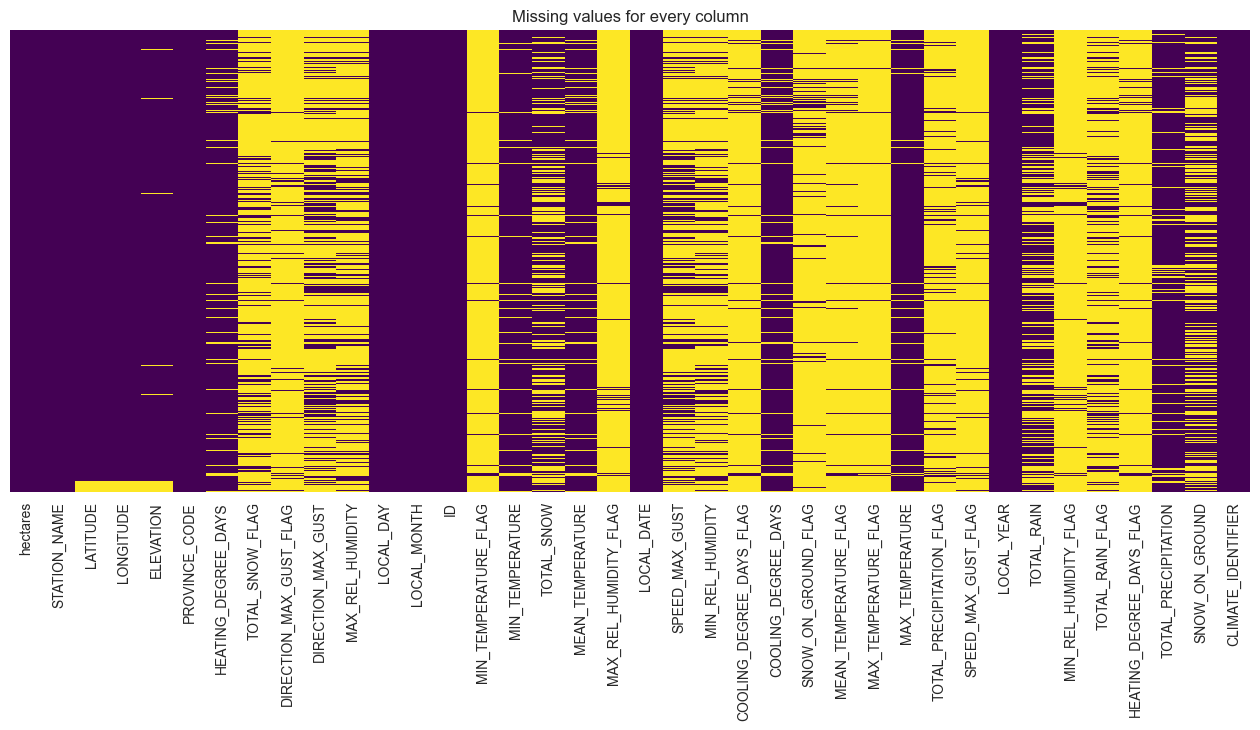

In [38]:
# Heatmap of missing values
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing values for every column')
plt.show()

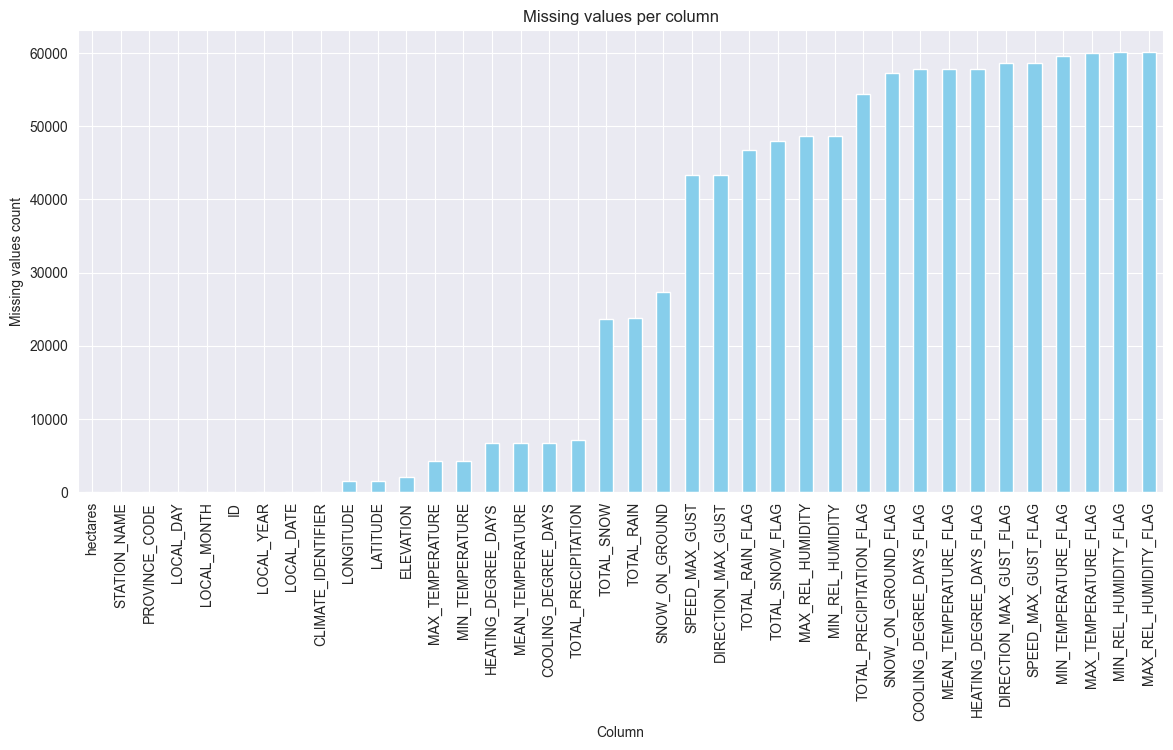

In [39]:
# Bar plot of missing values
missing_values = df.isnull().sum().sort_values(ascending=True)
missing_values.plot(kind='bar', color='skyblue', figsize=(14, 6))
plt.title('Missing values per column')
plt.xlabel('Column')
plt.ylabel('Missing values count')
plt.show()

In [40]:
missing_values = df.isnull().sum()
missing_percentage = missing_values / len(df) * 100
missing_percentage_df = pd.DataFrame({
    'missing_percentage': missing_percentage,
    'missing-values': missing_values
})
missing_percentage_df.sort_values('missing_percentage', ascending=False, inplace=True)

In [41]:
missing_percentage_df

,missing_percentage,missing-values
MAX_REL_HUMIDITY_FLAG,95.426413,60132
MIN_REL_HUMIDITY_FLAG,95.415305,60125
MAX_TEMPERATURE_FLAG,95.156632,59962
MIN_TEMPERATURE_FLAG,94.593265,59607
SPEED_MAX_GUST_FLAG,93.069794,58647
DIRECTION_MAX_GUST_FLAG,92.982512,58592
MEAN_TEMPERATURE_FLAG,91.660583,57759
HEATING_DEGREE_DAYS_FLAG,91.660583,57759
COOLING_DEGREE_DAYS_FLAG,91.660583,57759
SNOW_ON_GROUND_FLAG,90.879804,57267


Columns with the highest percentage of NaN values are ones with `FLAG`, which is normal because a flag is only present under a specific condition

Certain features that we care about are also missing in large quantities: Snow (44%), max/min humidity (78%), total rain (36%), total precipitation (10%), total snow (36%), speed of max gust (70%), direction of max gust (70%), max/min temperature (6%), mean temperature (11%)

In [42]:
df.describe()

,hectares,LATITUDE,LONGITUDE,ELEVATION,HEATING_DEGREE_DAYS,DIRECTION_MAX_GUST,MAX_REL_HUMIDITY,LOCAL_DAY,LOCAL_MONTH,MIN_TEMPERATURE,TOTAL_SNOW,MEAN_TEMPERATURE,SPEED_MAX_GUST,MIN_REL_HUMIDITY,COOLING_DEGREE_DAYS,MAX_TEMPERATURE,LOCAL_YEAR,TOTAL_RAIN,TOTAL_PRECIPITATION,SNOW_ON_GROUND
count,63014.000000,61558.000000,61558.000000,60908.000000,56302.000000,19637.000000,14378.000000,63014.000000,63014.000000,58749.000000,39426.000000,56302.000000,19701.000000,14371.000000,56302.000000,58819.000000,63014.000000,39250.000000,55959.000000,35617.000000
mean,259.288441,52.408774,-102.074234,507.539075,7.193212,13.307786,87.863542,15.513695,5.855350,4.821539,0.165612,11.561746,26.713720,41.907105,0.754957,18.335252,2008.998270,1.792642,1.859651,4.595036
std,5319.412697,4.705389,20.745942,404.315282,8.316091,12.981876,11.280073,8.804715,1.796957,8.848449,1.301654,9.105216,22.533338,17.452596,1.698901,9.905606,6.652422,4.997647,5.030521,15.632645
min,0.000000,40.065300,-162.480000,1.200000,0.000000,0.000000,22.000000,1.000000,1.000000,-46.900000,0.000000,-44.800000,0.000000,8.000000,0.000000,-42.700000,1999.000000,0.000000,0.000000,0.000000
25%,0.000000,49.212300,-117.669450,224.100000,0.000000,0.000000,83.000000,8.000000,5.000000,0.000000,0.000000,6.600000,0.000000,29.000000,0.000000,12.950000,2003.000000,0.000000,0.000000,0.000000
50%,0.009000,51.829461,-111.302250,409.700000,4.400000,12.000000,91.000000,15.000000,6.000000,6.500000,0.000000,13.600000,33.000000,39.000000,0.000000,20.500000,2007.000000,0.000000,0.000000,0.000000
75%,0.200000,55.453692,-85.260000,698.000000,11.400000,26.000000,96.000000,23.000000,7.000000,11.000000,0.000000,18.100000,43.000000,52.000000,0.100000,25.500000,2014.000000,1.000000,1.200000,0.000000
max,577646.800000,82.310400,116.188000,2926.100000,62.800000,36.000000,100.000000,31.000000,12.000000,26.500000,38.600000,34.400000,149.000000,100.000000,16.400000,47.900000,2024.000000,168.000000,168.000000,322.000000


## Imputing data
For `TOTAL_RAIN`, `TOTAL_PRECIPITATION`, `SNOW_ON_GROUND`, and `TOTAL_SNOW`, we will fill `NaN` values with 0 because `NaN` in these columns mean there is no snow/rain

In [43]:
zero_columns = ['TOTAL_RAIN', 'TOTAL_PRECIPITATION', 'SNOW_ON_GROUND', 'TOTAL_SNOW']
df[zero_columns] = df[zero_columns].fillna(0)

We impute missing values `MIN_TEMPERATURE`, `MAX_TEMPERATURE` using mean. Do do this, we group the fires by their respective station location (more general than fire location), and compute the mean for each location, and then use that value for missing inputs.

In [44]:
# Create new coordinates column
df['COORDINATES'] = df['LATITUDE'].astype(str) + ',' + df['LONGITUDE'].astype(str)

In [45]:
df

,hectares,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,PROVINCE_CODE,HEATING_DEGREE_DAYS,TOTAL_SNOW_FLAG,DIRECTION_MAX_GUST_FLAG,DIRECTION_MAX_GUST,...,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER,COORDINATES
0,6.0,EGG ISLAND,50.9050,-126.9292,14.0,BC,11.3,NaN,NaN,NaN,...,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646,"50.905,-126.9292"
1,1000.0,SAMBAA K'E,59.9617,-121.3608,498.0,NT,0.5,NaN,NaN,NaN,...,NaN,2000.0,0.0,NaN,NaN,NaN,0.0,0.0,220CQHR,"59.9617,-121.3608"
2,12.0,SAMBAA K'E,59.9752,-121.0342,498.0,NT,2.6,NaN,NaN,NaN,...,NaN,2000.0,0.0,NaN,NaN,NaN,0.0,0.0,220CQHR,"59.9752,-121.0342"
3,5.0,FORT NELSON UA,59.1767,-122.0190,378.3,BC,0.3,NaN,NaN,NaN,...,NaN,2001.0,0.0,NaN,T,NaN,0.0,0.0,1192950,"59.1767,-122.019"
4,0.1,PETITOT LO,59.4008,-120.6438,777.2,AB,2.0,NaN,NaN,NaN,...,NaN,2000.0,1.2,NaN,NaN,NaN,1.2,0.0,3075171,"59.4008,-120.6438"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63009,0.0,YELLOW GRASS NORTH,NaN,NaN,NaN,SK,29.2,M,NaN,32.0,...,NaN,2017.0,0.0,NaN,M,NaN,0.0,10.0,4019041,"nan,nan"
63010,0.0,YOHO PARK,NaN,NaN,NaN,BC,NaN,M,M,NaN,...,M,2000.0,0.0,NaN,M,M,0.2,0.0,11790J1,"nan,nan"
63011,0.0,YORKTON A,NaN,NaN,NaN,SK,27.6,NaN,NaN,0.0,...,NaN,2000.0,0.0,M,NaN,NaN,0.0,6.0,4019080,"nan,nan"
63012,0.0,YORKTON RCMP SNOW,NaN,NaN,NaN,SK,NaN,NaN,NaN,NaN,...,NaN,2010.0,0.0,NaN,NaN,NaN,0.0,25.0,4019095,"nan,nan"


In [46]:
# Group values by their location, for each location associate mean value for min temp
min_temps = df.groupby('COORDINATES')['MIN_TEMPERATURE'].transform('mean')

In [47]:
df['MIN_TEMPERATURE'] = df['MIN_TEMPERATURE'].fillna(min_temps)

In [48]:
print(df['MIN_TEMPERATURE'].isnull().sum())

2882


In [49]:
# Grouping for max temp
max_temps = df.groupby('COORDINATES')['MAX_TEMPERATURE'].transform('mean')

In [50]:
df['MAX_TEMPERATURE'] = df['MAX_TEMPERATURE'].fillna(max_temps)

In [51]:
print(df['MAX_TEMPERATURE'].isnull().sum())

2874


To impute missing values for `MEAN_TEMPERATURE`, we will average the minimum and maximum temperature for each row

In [52]:
# Check out missing values of MEAN_TEMP before imputing
missing_means = df[df['MEAN_TEMPERATURE'].isnull()]

In [53]:
missing_means

,hectares,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,PROVINCE_CODE,HEATING_DEGREE_DAYS,TOTAL_SNOW_FLAG,DIRECTION_MAX_GUST_FLAG,DIRECTION_MAX_GUST,...,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER,COORDINATES
33,6.000,HUDSON HOPE,55.8350,-121.6727,491.0,BC,NaN,NaN,NaN,NaN,...,NaN,2001.0,0.0,NaN,NaN,NaN,0.0,0.0,1183629,"55.835,-121.6727"
35,0.009,FORT ST JOHN 8NW,56.0303,-120.9710,808.0,BC,NaN,NaN,NaN,NaN,...,NaN,2001.0,0.0,NaN,NaN,NaN,0.0,0.0,118L0LK,"56.0303,-120.971"
36,0.010,TAYLOR FLATS,56.1098,-120.3676,517.0,BC,NaN,NaN,NaN,NaN,...,NaN,2001.0,4.0,NaN,NaN,NaN,4.0,0.0,1188020,"56.1098,-120.3676"
42,45.000,FORT ST JOHN 8NW,56.0213,-121.0085,808.0,BC,NaN,NaN,NaN,NaN,...,NaN,2000.0,0.0,NaN,NaN,NaN,0.0,0.0,118L0LK,"56.0213,-121.0085"
52,1.000,MILL BAY 1 SOUTHWEST,55.0057,-129.8263,3.0,BC,NaN,NaN,NaN,NaN,...,NaN,2003.0,0.0,NaN,NaN,NaN,0.0,0.0,1015136,"55.0057,-129.8263"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62991,0.000,WINNIPEG SOUTH,NaN,NaN,NaN,MB,NaN,NaN,NaN,NaN,...,NaN,2004.0,0.0,NaN,NaN,NaN,0.0,0.0,502M001,"nan,nan"
62993,0.000,WINNIPEG WTC STAPON,NaN,NaN,NaN,MB,NaN,NaN,NaN,NaN,...,NaN,2008.0,0.0,NaN,NaN,NaN,0.0,20.0,5023283,"nan,nan"
63002,0.000,WROXETER,NaN,NaN,NaN,ON,NaN,C,NaN,NaN,...,NaN,2005.0,0.0,NaN,NaN,NaN,0.0,0.0,6129660,"nan,nan"
63010,0.000,YOHO PARK,NaN,NaN,NaN,BC,NaN,M,M,NaN,...,M,2000.0,0.0,NaN,M,M,0.2,0.0,11790J1,"nan,nan"


In [54]:
# Fill in NaN values with average
df['MEAN_TEMPERATURE'] = df['MEAN_TEMPERATURE'].fillna((df['MAX_TEMPERATURE'] + df['MIN_TEMPERATURE']) / 2)

In [55]:
# Check out MEAN_TEMP after imputing
df

,hectares,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,PROVINCE_CODE,HEATING_DEGREE_DAYS,TOTAL_SNOW_FLAG,DIRECTION_MAX_GUST_FLAG,DIRECTION_MAX_GUST,...,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER,COORDINATES
0,6.0,EGG ISLAND,50.9050,-126.9292,14.0,BC,11.3,NaN,NaN,NaN,...,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646,"50.905,-126.9292"
1,1000.0,SAMBAA K'E,59.9617,-121.3608,498.0,NT,0.5,NaN,NaN,NaN,...,NaN,2000.0,0.0,NaN,NaN,NaN,0.0,0.0,220CQHR,"59.9617,-121.3608"
2,12.0,SAMBAA K'E,59.9752,-121.0342,498.0,NT,2.6,NaN,NaN,NaN,...,NaN,2000.0,0.0,NaN,NaN,NaN,0.0,0.0,220CQHR,"59.9752,-121.0342"
3,5.0,FORT NELSON UA,59.1767,-122.0190,378.3,BC,0.3,NaN,NaN,NaN,...,NaN,2001.0,0.0,NaN,T,NaN,0.0,0.0,1192950,"59.1767,-122.019"
4,0.1,PETITOT LO,59.4008,-120.6438,777.2,AB,2.0,NaN,NaN,NaN,...,NaN,2000.0,1.2,NaN,NaN,NaN,1.2,0.0,3075171,"59.4008,-120.6438"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63009,0.0,YELLOW GRASS NORTH,NaN,NaN,NaN,SK,29.2,M,NaN,32.0,...,NaN,2017.0,0.0,NaN,M,NaN,0.0,10.0,4019041,"nan,nan"
63010,0.0,YOHO PARK,NaN,NaN,NaN,BC,NaN,M,M,NaN,...,M,2000.0,0.0,NaN,M,M,0.2,0.0,11790J1,"nan,nan"
63011,0.0,YORKTON A,NaN,NaN,NaN,SK,27.6,NaN,NaN,0.0,...,NaN,2000.0,0.0,M,NaN,NaN,0.0,6.0,4019080,"nan,nan"
63012,0.0,YORKTON RCMP SNOW,NaN,NaN,NaN,SK,NaN,NaN,NaN,NaN,...,NaN,2010.0,0.0,NaN,NaN,NaN,0.0,25.0,4019095,"nan,nan"


## Feature selection and dropping data
Features that would make sense to include weather data that could logically directly impact the spread of the wildfire: rain, temperature, humidity, precipitation, snow.
- While humidity would logically greatly impact the accuracy of the model, 78% of `MIN_REL_HUMIDITY` and `MAX_REL_HUMIDITY` are missing, so we have no choice but to drop these columns
- Wind would also logically greatly impact the spread of the fire, but 70% of `SPEED_MAX_GUST` is missing and 90% of `DIRECTION_MAX_GUST` is missing
- Columns with `FLAG` are not useful 
- We will drop `COOLING_DEGREE_DAYS` and `HEATING_DEGREE_DAYS`: they are defined as the number of degree Celsius that the mean temperature is above/below 18 degrees Celsius. Metric is another way of expressing temperature
- We will hypothesize that location has an impact on areas of wildfire: `LONGITUDE`, `LATITUDE` (location might impact wildfire spread); `ELEVATION` might also be useful. However, due to the way that we queried non-wildfire data (by searching 50 days earlier, lon/lat/elevation will have little impact, since the same spots will always have a wildfire as well as a non-wildfire (0 hectares). However we also queried weather data from unaffected weather stations
- For weather, we will use `MIN_TEMPERATURE`, `MAX_TEMPERATURE`, `MIN_TEMPERATURE`, `SNOW_ON_GROUND`, `TOTAL_RAIN`, `TOTAL_PRECIPITATION`

In [56]:
# Drop entries without min/max/mean temperature
df = df.dropna(subset=['MIN_TEMPERATURE', 'MAX_TEMPERATURE', 'MEAN_TEMPERATURE'])

In [57]:
missing_values = df.isnull().sum()
missing_percentage = missing_values / len(df) * 100
missing_percentage_df = pd.DataFrame({
    'missing_percentage': missing_percentage,
    'missing-values': missing_values
})
missing_percentage_df.sort_values('missing_percentage', ascending=False, inplace=True)

In [58]:
missing_percentage_df

,missing_percentage,missing-values
MAX_TEMPERATURE_FLAG,97.279159,56097
MIN_TEMPERATURE_FLAG,96.769327,55803
MAX_REL_HUMIDITY_FLAG,95.408039,55018
MIN_REL_HUMIDITY_FLAG,95.394166,55010
COOLING_DEGREE_DAYS_FLAG,93.996462,54204
HEATING_DEGREE_DAYS_FLAG,93.996462,54204
MEAN_TEMPERATURE_FLAG,93.996462,54204
SPEED_MAX_GUST_FLAG,93.417265,53870
DIRECTION_MAX_GUST_FLAG,93.330559,53820
SNOW_ON_GROUND_FLAG,90.817813,52371


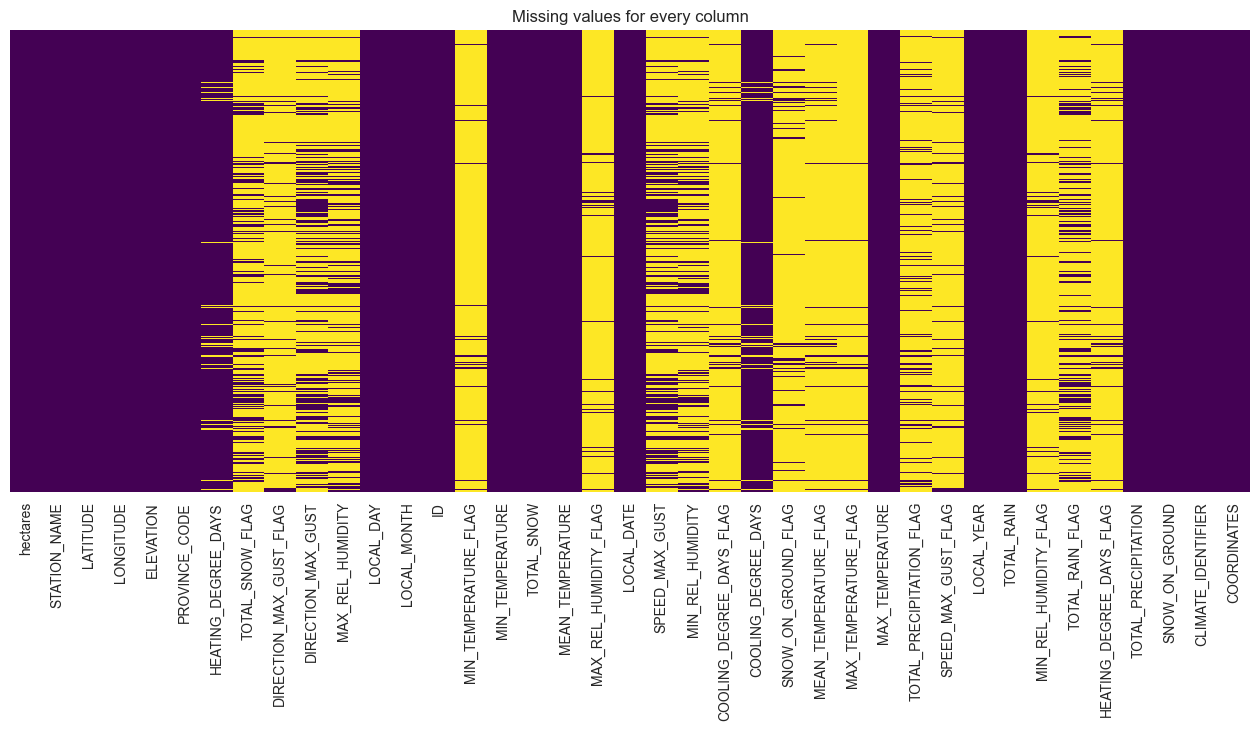

In [60]:
# Heatmap of missing values
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing values for every column')
plt.show()

In [65]:
# Select columns for final training dataset and 
clean_df = df[['LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATION_NAME', 'PROVINCE_CODE', 'ID', 'LOCAL_DATE', 'LOCAL_DAY', 'LOCAL_MONTH', 'LOCAL_YEAR', 'MIN_TEMPERATURE', 'MAX_TEMPERATURE', 'MEAN_TEMPERATURE', 'SNOW_ON_GROUND', 'TOTAL_SNOW', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN',  'hectares']]

In [66]:
clean_df

,LATITUDE,LONGITUDE,ELEVATION,STATION_NAME,PROVINCE_CODE,ID,LOCAL_DATE,LOCAL_DAY,LOCAL_MONTH,LOCAL_YEAR,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE,SNOW_ON_GROUND,TOTAL_SNOW,TOTAL_PRECIPITATION,TOTAL_RAIN,hectares
0,50.905000,-126.929200,14.0,EGG ISLAND,BC,1062646.2000.3.10,2000-03-10 00:00:00,10.0,3.0,2000.0,2.0,11.3,6.7,0.0,0.0,3.5,3.5,6.0
1,59.961700,-121.360800,498.0,SAMBAA K'E,NT,220CQHR.2000.6.27,2000-06-27 00:00:00,27.0,6.0,2000.0,7.9,27.0,17.5,0.0,0.0,0.0,0.0,1000.0
2,59.975200,-121.034200,498.0,SAMBAA K'E,NT,220CQHR.2000.7.11,2000-07-11 00:00:00,11.0,7.0,2000.0,9.9,20.9,15.4,0.0,0.0,0.0,0.0,12.0
3,59.176700,-122.019000,378.3,FORT NELSON UA,BC,1192950.2001.6.13,2001-06-13 00:00:00,13.0,6.0,2001.0,8.5,26.8,17.7,0.0,0.0,0.0,0.0,5.0
4,59.400800,-120.643800,777.2,PETITOT LO,AB,3075171.2000.6.26,2000-06-26 00:00:00,26.0,6.0,2000.0,8.0,24.0,16.0,0.0,0.0,1.2,1.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61553,48.595901,-113.223400,1354.0,CARWAY,AB,3031402.2024.5.20,2024-05-20 00:00:00,20.0,5.0,2024.0,-1.4,8.7,3.6,0.0,0.0,4.1,0.0,0.0
61554,59.340000,-108.290000,318.2,URANIUM CITY (AUT),SK,406QLD0.2024.5.23,2024-05-23 00:00:00,23.0,5.0,2024.0,0.8,16.6,8.7,0.0,0.0,0.0,0.0,0.0
61555,67.341200,-139.502400,250.2,OLD CROW A,YT,2100807.2024.5.10,2024-05-10 00:00:00,10.0,5.0,2024.0,0.7,8.1,4.4,0.0,0.0,0.0,0.0,0.0
61556,67.341200,-139.502400,250.2,OLD CROW A,YT,2100807.2024.4.30,2024-04-30 00:00:00,30.0,4.0,2024.0,-14.1,-8.0,-11.1,0.0,0.0,0.0,0.0,0.0


In [67]:
clean_df.to_csv('clean-weather.csv', index=False)